# 1

**Q:** Why do we use the last 4 time steps as input to the network for palying Atari games?

**A:** This technique is called frame-skipping. It takes much less computation for the emulator to go forward one frame than for the agent to compute an action, and that neighbouring samples are highly correlated, which makes learning from consecutive frames inefficient. With frame-skipping (e.g. $k=4$), the agent can about about $k$ times more games than otherwise.

# 2

**Q:** In DQN, what would be a benefit of experience replay? What would be a benefit of the target network?

**A: ** 

Benefits of experience reply:

1. each step of experience is potentially used in many weight updates, which allows for greater data efficiency.
2. learning directly from consecutive samples is inefficient, owing to the strong correlations between samples; randomizing the samples breaks these correlations and therefore reduces the variance of the updates.
3. wehn learning on-policy the current parameters determine the next data sample that the parameters are trained. Thus, off-policy is necessary, which motivates the choice of Q-learning. 

With experience replay, the behavior distribution is averaged over many of the previous states, smoothing out the loss landscape and reducing the probability of getting stuck into poor local minima. 

Benefits of target network:

1. It makes the DQN algorithm more stable compared to standard online Q-learning, where an update tahn increases $Q(s_t, a_t)$ often also increases $Q(s_{t+1}, a)$ for all $a$ and hence also increases the target $y_i$, possibly leading to oscillations or divergence of the policy. Generating the targets using an older set of parameters adds a delay between the time an update to $Q$ is made and the time the update affects the targets $y_i$, making divergence or oscillations much more unlikely.

See Methods of https://www.nature.com/articles/nature14236

# 3

**Q:** What would be a benefit of representing the Q function as $\hat q(s, w) \in \mathbb{R}^K$, where $K$ is the total number of actions, instead of $\hat q(s,a,w)$ as a scalar for each $(s, a)$ pair?

**A:** The main advantage of such an architectur is its ability to compute Q-values for all actions in a single forward pass instead of $K$ passes for each possible action.

# 4

see `./q3_nature.py`

Sample output:

```
Evaluating...
Average reward: 0.20 +/- 0.00
Populating the memory 150/200...
Evaluating...
Average reward: -1.00 +/- 0.00
 301/1000 [========>.....................] - ETA: 2s - Loss: 6.3300 - Avg R: 0.2050 - Max R: 1.9000 - eps: 0.4060 - Grads: 0.0000 - Max Q: 0.1107 - lr: 0.0002
 401/1000 [===========>..................] - ETA: 2s - Loss: 2.4600 - Avg R: -0.0450 - Max R: 1.7000 - eps: 0.0100 - Grads: 0.0000 - Max Q: 0.0830 - lr: 0.0001
 501/1000 [==============>...............] - ETA: 2s - Loss: 3.4700 - Avg R: 0.4950 - Max R: 0.5000 - eps: 0.0100 - Grads: 0.0000 - Max Q: 0.0664 - lr: 0.0001
 601/1000 [=================>............] - ETA: 1s - Loss: 1.3900 - Avg R: 0.4300 - Max R: 0.5000 - eps: 0.0100 - Grads: 0.0000 - Max Q: 0.0553 - lr: 0.0001
 701/1000 [====================>.........] - ETA: 1s - Loss: 1.3200 - Avg R: 0.5000 - Max R: 0.5000 - eps: 0.0100 - Grads: 0.0000 - Max Q: 0.0474 - lr: 0.0001
 801/1000 [=======================>......] - ETA: 0s - Loss: 1.3100 - Avg R: 0.5000 - Max R: 0.5000 - eps: 0.0100 - Grads: 0.0000 - Max Q: 0.0415 - lr: 0.0001
 901/1000 [==========================>...] - ETA: 0s - Loss: 0.3200 - Avg R: 0.5000 - Max R: 0.5000 - eps: 0.0100 - Grads: 0.0000 - Max Q: 0.0369 - lr: 0.0001
1001/1000 [==============================] - 4s - Loss: 0.3200 - Avg R: 0.5000 - Max R: 0.5000 - eps: 0.0100 - Grads: 0.0000 - Max Q: 0.0332 - lr: 0.0001
- Training done.
Evaluating...
Average reward: 0.50 +/- 0.00
```

# 5

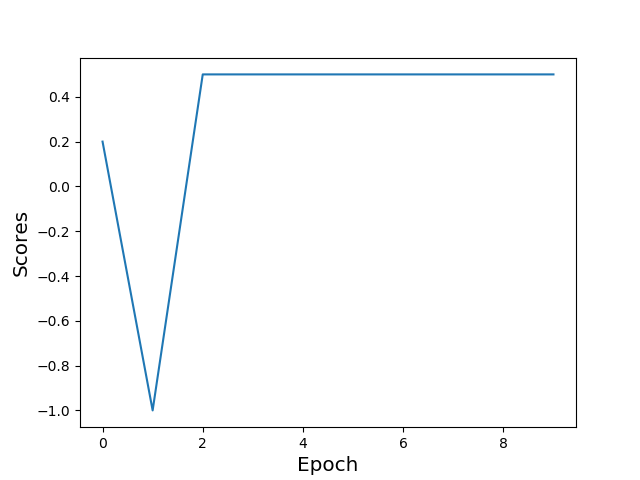

In [10]:
from IPython.display import Image
Image('./results/q3_nature/scores.png', width=400)

Compared to results from linear approximation (below), the agent doesn't find the policy to achieve maximum scores. This could be due to the high capacity of the convnet, which makes the agent stuck at local minima easily, esp. given the simplicity of the TestEnv.

It also takes longer time to train as the convnet require much more computation than a linear function.

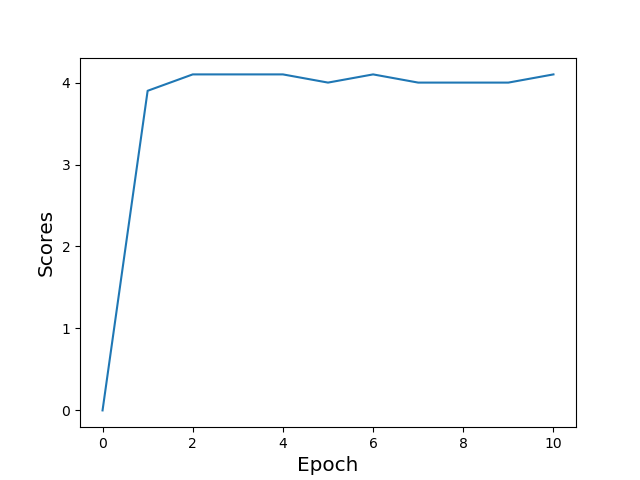

In [11]:
from IPython.display import Image
Image('./results/q2_linear/scores.png', width=400)

# 6

* The number of parameters for the Q network with tensor (80, 80, 4) as input:

conv1: 32 (kernels) * (8 * 8 + 1) = 2080
conv2: 64 (kernels) * (4 * 4 + 1) = 1088
conv3: 64 (kernels) * (3 * 3 + 1) = 640
fc: (6400 + 1) * 512 (neurons) = 3,277,312
out: (3277312 + 1) * 2 (actions) = 6,554,626

In sum: there are 2080 + 1088 + 640 + 3,277,312 + 6,554,626 = 9,835,746 parameters

* The number of parameters in linear approximation:

80 * 80 * 4 + 1 = 25,601 parameters, ~400 times fewer parameters

# 7

Included below is a screenshot visualization of DQN graph

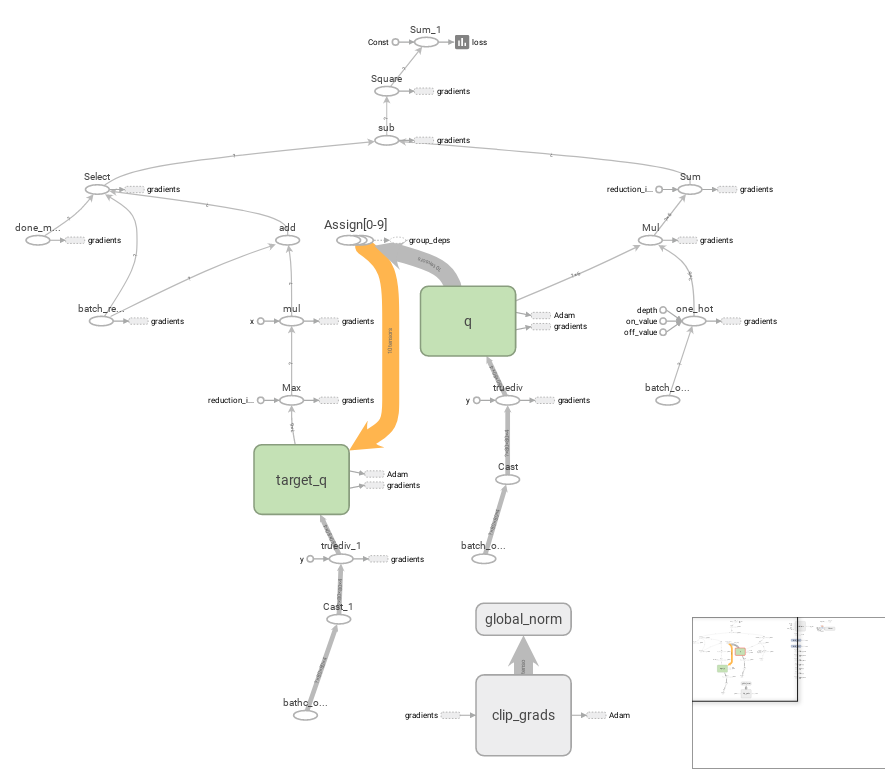

In [12]:
Image('./tensorboard-DQN-graph.png')